In [1]:
import pandas as pd
# Read IO table
code_guide=pd.read_excel('Sector_Codes.xlsx')
code_guide['Code']= code_guide['Code'].astype('str')
io_df=pd.read_csv('matrix_eu-ic-io_ind-by-ind_24ed_2022.csv',index_col=0) # Figaro Format
sel_region='SE'
row_indices = io_df.reset_index().applymap(lambda x: isinstance(x, str) and x.startswith(sel_region)).any(axis=1)
row_indices = row_indices[row_indices].index.tolist()
col_indices = [idx for idx, col in enumerate(io_df.columns) if col.startswith(sel_region)]
sel_df = io_df.reset_index().set_index('rowLabels').iloc[row_indices[0]:row_indices[-1]+1, row_indices[0]:row_indices[-1]+1] 
codes=sel_df.index


In [2]:
io_df

AR_A01   AR_A02    AR_A03       AR_B  AR_C10T12  AR_C13T15  \
rowLabels                                                                   
AR_A01      11169.824   26.196    42.476     15.364  36990.250    293.714   
AR_A02         71.583   78.640     0.819      6.874     47.297      1.389   
AR_A03         11.568    0.052   146.423      0.600   2204.475      9.354   
AR_B          554.417   10.206   111.020   4338.848    468.035     21.590   
AR_C10T12    2963.864    2.284    81.030     33.285   9242.464    149.175   
...               ...      ...       ...        ...        ...        ...   
W2_OP_RES       0.000    0.000     0.000      0.000      0.000      0.000   
W2_OP_NRES      0.000    0.000     0.000      0.000      0.000      0.000   
W2_D1        9771.363  185.026   680.481   7334.001  17001.408   2277.035   
W2_D29X39  -11027.424    3.985   -37.118   -134.826    400.463     41.190   
W2_B2A3G    43914.421  464.768  1105.976  11226.812  14820.499   1705.131   

             AR_C16    AR_C17   AR_C18    AR_C19  ...  US_P3_S13   US_P3_S14  \
rowLabels                                         ...                          
AR_A01       30.065    31.700    0.989     7.142  ...        0.0     211.529   
AR_A02      271.358   168.987    0.516     0.366  ...        0.0       0.162   
AR_A03        0.030     0.054    0.017     0.012  ...        0.0       0.940   
AR_B          8.799   154.907    6.789  9251.018  ...        0.0       0.034   
AR_C10T12    11.248    95.169   23.733    20.878  ...        0.0     720.580   
...             ...       ...      ...       ...  ...        ...         ...   
W2_OP_RES     0.000     0.000    0.000     0.000  ...        0.0  173625.829   
W2_OP_NRES    0.000     0.000    0.000     0.000  ...        0.0 -133593.546   
W2_D1       926.983  1446.816  900.254  1668.657  ...        0.0       0.000   
W2_D29X39    21.863    45.400    8.900   205.746  ...        0.0       0.000   
W2_B2A3G    652.155  1341.453  563.471  3740.500  ...        0.0       0.000   

            US_P3_S15  US_P51G  US_P5M  ZA_P3_S13  ZA_P3_S14  ZA_P3_S15  \
rowLabels                                                                 
AR_A01            0.0    0.000   0.273        0.0     16.030        0.0   
AR_A02            0.0    0.000  -0.002        0.0      0.012        0.0   
AR_A03            0.0    0.008   0.074        0.0      0.076        0.0   
AR_B              0.0    4.358   7.902        0.0      0.000        0.0   
AR_C10T12         0.0    1.392  20.474        0.0     77.350        0.0   
...               ...      ...     ...        ...        ...        ...   
W2_OP_RES         0.0    0.000   0.000        0.0   1270.576        0.0   
W2_OP_NRES        0.0    0.000   0.000        0.0  -3107.209        0.0   
W2_D1             0.0    0.000   0.000        0.0      0.000        0.0   
W2_D29X39         0.0    0.000   0.000        0.0      0.000        0.0   
W2_B2A3G          0.0    0.000   0.000        0.0      0.000        0.0   

            ZA_P51G  ZA_P5M  
rowLabels                    
AR_A01        0.000     0.0  
AR_A02        0.000     0.0  
AR_A03        0.000     0.0  
AR_B          0.000     0.0  
AR_C10T12     0.036     0.0  
...             ...     ...  
W2_OP_RES     0.000     0.0  
W2_OP_NRES    0.000     0.0  
W2_D1         0.000     0.0  
W2_D29X39     0.000     0.0  
W2_B2A3G      0.000     0.0  

[2950 rows x 3174 columns]

In [3]:
sel_df

SE_A01    SE_A02  SE_A03     SE_B  SE_C10T12  SE_C13T15  \
rowLabels                                                              
SE_A01     1680.462   212.740   4.350    8.322   3653.539     13.660   
SE_A02      280.132  3009.099   1.225    0.138      0.768      0.019   
SE_A03        2.669     0.007  38.922    0.009     15.030      0.004   
SE_B         66.738     0.990   0.012  607.370      7.290      0.076   
SE_C10T12   749.208     4.468  14.597    7.892   1888.322      3.536   
...             ...       ...     ...      ...        ...        ...   
SE_S94       10.113     3.859   0.001    0.783      8.915      0.217   
SE_S95        0.365     0.149   0.005   12.097     16.201      0.021   
SE_S96        5.176     0.948   0.009    1.165      1.778      0.086   
SE_T          0.000     0.000   0.000    0.000      0.000      0.000   
SE_U          0.000     0.000   0.000    0.000      0.000      0.000   

             SE_C16    SE_C17  SE_C18  SE_C19  ...   SE_P85   SE_Q86  \
rowLabels                                      ...                     
SE_A01      159.040   103.248   0.808   3.660  ...   50.348   74.425   
SE_A02     2808.216  1819.881   0.091   0.044  ...    0.447    0.391   
SE_A03        0.019     0.027   0.002   0.095  ...    1.588    5.829   
SE_B          4.986   102.627   0.127   7.966  ...    2.011    3.147   
SE_C10T12    12.733    22.549   2.164  79.453  ...  281.092  296.532   
...             ...       ...     ...     ...  ...      ...      ...   
SE_S94        8.422     4.079   0.469  31.744  ...   26.198   15.964   
SE_S95       21.050    26.541   0.042   4.393  ...    8.252    6.631   
SE_S96        6.969     1.910   0.198   0.262  ...   20.350  108.781   
SE_T          0.000     0.000   0.000   0.000  ...    0.001    0.008   
SE_U          0.000     0.000   0.000   0.000  ...    0.000    0.000   

           SE_Q87_88  SE_R90T92   SE_R93   SE_S94  SE_S95  SE_S96  SE_T  SE_U  
rowLabels                                                                      
SE_A01       154.293      6.741  143.381   18.957   0.158  28.427   0.0     0  
SE_A02         0.116      0.224    0.423    0.341   0.079   0.176   0.0     0  
SE_A03         0.447      0.039    2.051    0.007   0.000   0.003   0.0     0  
SE_B           1.021      2.615    7.540    2.972   0.092   0.933   0.0     0  
SE_C10T12    387.187     31.933  185.545    4.974   0.219   2.540   0.0     0  
...              ...        ...      ...      ...     ...     ...   ...   ...  
SE_S94        28.058      7.645   25.039  234.988  13.304   6.047   0.0     0  
SE_S95         5.086      2.146    0.363    0.087  28.662   0.039   0.0     0  
SE_S96        56.749      4.235   19.001    9.350   0.087   9.807   0.0     0  
SE_T           0.004      0.000    0.001    0.001   0.000   0.001   0.0     0  
SE_U           0.000      0.000    0.000    0.000   0.000   0.000   0.0     0  

[64 rows x 64 columns]

In [4]:
# Read input dictionaries
contributions= {'crop_yield_total': 0.44, 'discharge': 0.65,'hydro_prod': 0.44}
sector_codes= {'Crop and animal production, hunting and related service activities': 'A01', 
               'Electricity, gas, steam and air conditioning supply': 'D35',
              'Water collection, treatment and supply': 'E36'}
sector_vars= {'A01': ['crop_yield_total'],
             'D35': ['hydro_prod'],
             'E36': ['discharge'],
             }
def process_df(df):
    if df.shape[0] > 1 and df.shape[1] > 1:
        return (df,
                [(r, s) for r, s in df.index.str.split('_', n=1)],
                [(r, s) for r, s in df.columns.str.split('_', n=1)])
    elif df.shape[0] == 1:
        return (df,
                df.index.to_list(),
                [(r, s) for r, s in df.columns.str.split('_', n=1)])
    else:
        return (df,
                [(r, s) for r, s in df.index.str.split('_', n=1)],
                df.columns.to_list())
# Code adapted from 'iopy' Library to calculate economic variables from IO table
# More information on the variables found in https://github.com/WWakker/iopy
rs= 64*46 # number of sectors times number of countries
"""  Created on 03/10/2022::
------------- matrix -------------
**Authors**: W. Wakker

"""
import numpy as np


class Matrix(np.ndarray):

    def __new__(cls, info, input_array, rows, columns):
        obj = np.asarray(input_array).view(cls)
        assert len(obj.shape) == 2, "Array must be 2-dimensional"
        assert obj.shape == (len(rows), len(columns)), "Rows and columns do not have the shape of the array"
        obj.info = info
        obj.rows = rows
        obj.columns = columns
        return obj

    def __array_finalize__(self, obj):
        self.info = getattr(obj, 'info', None)
        self.rows = getattr(obj, 'rows', None)
        self.columns = getattr(obj, 'columns', None)

    @property
    def I(self):
        """Invert matrix

        Returns:
            Inverted matrix
        """
        return np.linalg.inv(self)

    @property
    def T(self):
        """Transpose rows and columns

        Returns:
            Transposed Matrix
        """
        m = self.copy()
        m.rows, m.columns = m.columns, m.rows
        return np.transpose(m)

    def transpose(self):
        """Transpose rows and columns

        Returns:
            Transposed Matrix
        """
        m = self.copy()
        m.rows, m.columns = m.columns, m.rows
        return np.transpose(m)

    def flatten(self):
        """Convert to flattened numpy array

        Returns:
            flattened numpy array
        """
        m = np.array(self)
        return m.flatten()

    def to_numpy(self):
        """Convert to numpy array

        Returns:
            numpy array
        """
        return np.asarray(self)
Z = Matrix('Intermediate use',
           *process_df(io_df.iloc[:rs, :rs]))

FD_GRAN = Matrix('Final demand granular',
                 io_df.iloc[:rs, rs:],
                 rows=[(r, s) for r, s in io_df.iloc[:rs, rs:].index.map(str).str.split('_', n=1)],
                 columns=[(r, s) for r, s in io_df.iloc[:rs, rs:].columns.map(str).str.split('_', n=1)])

FD = Matrix('Final demand',
            FD_GRAN.sum(1).reshape(-1, 1),
            rows=Z.rows,
            columns=['FD'])

X = Matrix('X', # Output
           FD + Z.sum(1).reshape(-1, 1),
           rows=Z.rows,
           columns=['X'])

V = Matrix('GVA',
           (X.flatten() - Z.sum(0).flatten()).reshape(1, len(X)),
           rows=['GVA'],
           columns=Z.columns)


In [6]:
# Plot shocks, highlighting technical coefficients for edge thickness and losses to GVA magnitudes for node size
 
import networkx as nx
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import matplotlib
import matplotlib.pyplot as plt
import cairosvg
import matplotlib.patches as mpatches

# Define font properties for publication-quality visuals
SIZE_DEFAULT = 16
SIZE_LARGE = 18
plt.rc("font", family="Arial")
plt.rc("font", size=SIZE_DEFAULT)
plt.rc("axes", titlesize=SIZE_LARGE)
plt.rc("axes", labelsize=SIZE_LARGE)
plt.rc("xtick", labelsize=SIZE_DEFAULT)
plt.rc("ytick", labelsize=SIZE_DEFAULT)

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if float_list:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = mcolors.LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp
def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

# Modified from: Quantecon Library
def normalize_matrix(A):
    A_min = A.min()
    A_max = A.max()
    A_normalized = (A - A_min) / (A_max - A_min)
    return A_normalized

def to_zero_one(x):
    "Map vector x to the zero one interval."
    x = np.array(x)
    x_min, x_max = x.min(), x.max()
    return (x - x_min)/(x_max - x_min)

import matplotlib.cm as cm
def colorise_vector(weights,beta=True, color_palette=cm.rainbow):
    cp = color_palette(to_zero_one(weights))
    return cp 

def colorise_vector_log(weights, tol, color_palette):
    #norm = mcolors.LogNorm(vmin=np.min(weights), vmax=np.max(weights))
    norm = mcolors.LogNorm(vmin=tol, vmax=500)
    cp = color_palette(norm(weights))
    return cp 

def eigenvector_centrality(A, k=40, authority=False):
    """
    Computes the dominant eigenvector of A. Assumes A is
    primitive and uses the power method.
    """
    A_temp = A.T if authority else A
    n = len(A_temp)
    r = np.max(np.abs(np.linalg.eigvals(A_temp)))
    e = r**(-k) * (np.linalg.matrix_power(A_temp, k) @ np.ones(n))
    return e / np.sum(e)

def plot_shock(A,
                        ax,
                        codes,
                        codes_abbrev,
                        shock_df_dict,
                        node_size_list=None,
                        node_size_multiple=900, 
                        edge_size_multiple=1,
                        layout_type='circular',
                        layout_seed=1234,
                        tol=None):  # clip entries below tol

    # Create the light colormap 
    center = 25
    vmax= 100
    divnorm = mcolors.TwoSlopeNorm(vmin=tol,vcenter=center, vmax=vmax)
    hex_list = ['#ade8f4', '#d6f6eb', '#fdf1d2', '#faaaae']
    light_cmap=get_continuous_cmap(hex_list)
    G = nx.DiGraph()
    N = len(A)
    # Set the diagonal to zero to remove self-loops (sectors that use own outputs as inputs)
    np.fill_diagonal(A, 0)

    # Filter nodes and edges based on GVA losses threshold (tol)
    filtered_nodes = []
    filtered_node_sizes = []
    for i in range(N):
        if node_size_list[i] > tol:
            filtered_nodes.append(codes[i])
            filtered_node_sizes.append(node_size_list[i])
            
    # Add nodes without weights initially
    for i in range(len(filtered_nodes)):
        G.add_node(filtered_nodes[i], name=filtered_nodes[i])

    # Position the nodes
    if layout_type == 'circular':
        node_pos_dict = nx.circular_layout(G)
    elif layout_type == 'spring':
        node_pos_dict = nx.spring_layout(G, seed=layout_seed)
    elif layout_type == 'random':
        node_pos_dict = nx.random_layout(G, seed=layout_seed)
    elif layout_type == 'spiral':
        node_pos_dict = nx.spiral_layout(G)

    # Add the filtered nodes to the graph
    G.add_nodes_from(filtered_nodes)
    
    node_color_list = colorise_vector_log(filtered_node_sizes, tol, light_cmap)
    # Adjust the node sizes by adding the offset and applying a logarithmic transformation
    adjusted_node_sizes = np.log(np.array(filtered_node_sizes))
    adjusted_node_sizes = [element*node_size_multiple for element in adjusted_node_sizes]
    # Plot the network nodes for combined losses
    node_collection=nx.draw_networkx_nodes(G, 
                           node_pos_dict, 
                           nodelist=filtered_nodes, 
                           node_color=node_color_list, 
                           node_size=adjusted_node_sizes, 
                           edgecolors='grey', 
                           linewidths=2, 
                           alpha=1,
                           ax=ax)

    # Draw labels 
    for node, (x, y) in node_pos_dict.items():
        if node in filtered_nodes:
            n = codes.index(node)
            font_size = 9
            label = codes_abbrev[n]
            ax.text(x, y, label, fontsize=font_size, ha='center', va='center')
    # Draw edges for each hazard type
    hazards=['Flood', 'Drought', 'Heatwave']
    edge_colors={'Flood':'#1f77b4', 'Drought': '#000000', 'Heatwave': '#d62728'}
    edge_styles={'Flood':'solid', 'Drought': 'solid', 'Heatwave': 'solid'}
    edge_connections={'Flood':'arc3,rad=0.1', 'Drought': 'arc3,rad=0.3', 'Heatwave': 'arc3,rad=0.5'}
    for hazard in hazards:
        G_plot=G.copy()
        shock_df=shock_df_dict[hazard]
        edge_weights = []
        for i in range(N):
            for j in range(N):
                #a = A[i, j] # intermediate production coefficients as weights
                #a = G_inv[i, j] # Ghosh inverse coefficients as weights
                #a = delta_x.A1[i]/delta_x.A1[j]
                #a = shock_df.loc[shock_df['Code'] == codes[i], 'Final shock'].values[0]*(-1) 
                a = A[i,j]*shock_df.loc[shock_df['Code'] == codes[i], 'Final shock'].values[0]*(-1)
                if codes[i] in filtered_nodes and codes[j] in filtered_nodes:
                    G_plot.add_edge(codes[i], codes[j], weight=a)
                    edge_weights.append(a)
        #edge_colors = colorise_vector_log(edge_weights)
        edge_weights = np.sqrt(np.array(edge_weights))
        edge_weights = [element*edge_size_multiple for element in edge_weights]
        nx.draw_networkx_edges(G_plot, 
                               node_pos_dict, 
                               #label=hazard,
                               edge_color=edge_colors[hazard], 
                               style=edge_styles[hazard],
                               #edge_color=edge_colors,
                               node_size=adjusted_node_sizes,
                               width=edge_weights, 
                               arrows=True, 
                               arrowsize=20, 
                               alpha=1,#to_zero_one(edge_weights),
                               ax=ax, 
                               arrowstyle='->',
                               connectionstyle=edge_connections[hazard])
    node_collection.set_zorder(0)
    # Normalize node sizes for colormap
    #norm = mcolors.Normalize(vmin=tol, vmax=max(node_size_list)) # linear
    norm = mcolors.LogNorm(vmin=tol, vmax=vmax) # logarithm
    # Create the ScalarMappable object
    sm = cm.ScalarMappable(norm=norm, cmap=light_cmap)
    # Add the colorbar
    cbar = plt.colorbar(sm, ax=ax, fraction=0.03) 
    cbar.set_ticks([tol, 10, center, vmax])  # Set the ticks on the colorbar
    cbar.set_ticklabels([str(tol), '10', str(int(center)), str(int(vmax))])  # Custom tick labels
    cbar.set_label('GVA losses (million euros)', size=SIZE_DEFAULT)
    
    # Create the legend
    # Function to create a custom legend entry with an arrow
    def create_legend_arrow(color, label, linestyle):
        return mlines.Line2D([], [], color=color, label=label, linestyle=linestyle,
                             marker=r'$\longrightarrow$', markersize=30, markeredgewidth=0.15, linewidth=0)
    # Create custom lines with arrows for the legend
    flood_legend = create_legend_arrow(edge_colors['Flood'], 'Flood', edge_styles['Flood'])
    drought_legend = create_legend_arrow(edge_colors['Drought'], 'Drought', edge_styles['Drought'])
    heatwave_legend = create_legend_arrow(edge_colors['Heatwave'], 'Heatwave', edge_styles['Heatwave'])

    # Add the legend to the plot
    plt.legend(handles=[flood_legend, drought_legend, heatwave_legend], loc='upper center', 
               ncol=3, bbox_to_anchor=(0.50, 1.05),
              title='Cascading economic shocks ('+str(int(year))+')')
    plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.25)
    plt.savefig('fig_shock_'+str(int(year))+'.png', dpi=300, bbox_inches='tight')
    return G




In [16]:
# Calculate losses or gains automatically for multiple years and sectors
# Print total losses or gains per sector per year for comparison using 2022 as the base year

def estimate_shocks(io_df, anomalies, damage, year, sel_region, tol):
    print('\nAnomaly year: '+str(year))
    # Filter table for region
    row_indices = io_df.reset_index().applymap(lambda x: isinstance(x, str) and x.startswith(sel_region)).any(axis=1)
    row_indices = row_indices[row_indices].index.tolist()
    col_indices = [idx for idx, col in enumerate(io_df.columns) if col.startswith(sel_region)]
    sel_df = io_df.reset_index().set_index('rowLabels').iloc[row_indices[0]:row_indices[-1]+1, row_indices[0]:row_indices[-1]+1] 
    codes=sel_df.index
    # Read input dictionaries
    contributions= {'crop_yield_total': 0.44, 'discharge': 0.65,'hydro_prod': 0.44}
    sector_codes= {'Crop and animal production, hunting and related service activities': 'A01', 
                   'Electricity, gas, steam and air conditioning supply': 'D35',
                  'Water collection, treatment and supply': 'E36',
                  'Insurance, reinsurance and pension funding, except compulsory social security': 'K65'}
    sector_vars= {'A01': ['crop_yield_total'],
                 'D35': ['hydro_prod'],
                 'E36': ['discharge'],
                 'K65': ['damage']}
    outputs=np.array(X[:,0])[row_indices[0]:row_indices[-1]+1] # only for selected region
    gva=np.array(V[0])[row_indices[0]:row_indices[-1]+1] # only for selected region
    Z=np.matrix(sel_df) # matrix of intermediate production only for selected region
    # Compute the Allocation Coefficient Matrix (D)
    outputs[outputs==0] = 1 # Fill output vector to allow inversion
    D = Z / outputs
    # Calculate the Output Inverse (O)
    I = np.identity(len(D))
    O = np.linalg.inv(I - D)
    # Define the initial shock vector s
    s= np.array([0 for code in codes]).astype(float)
    shock_sectors=['K65','A01','E36', 'D35']
    shock_vars=['damage', 'crop_yield_total', 'discharge', 'hydro_prod']
    codes= [code.replace('SE_', '') for code in codes]
    hazards= ['Flood', 'Drought', 'Heatwave', 'Combined']
    shock_df_dict = {}
    for hazard in hazards:
        for shock_sector in shock_sectors:
            # Loop through the dictionary items
            #for title, code in sector_codes.items():
                #if code == shock_sector:
                    #print('\nImpacted sector: '+title)
            shock_vars=sector_vars.get(shock_sector)
            N=0
            for shock_var in shock_vars:
                sector_idx= np.where(np.array(codes)==shock_sector)[0][0]
                if shock_var=='damage' and (hazard=='Flood' or hazard=='Combined'):
                    df_anom=damage[damage['Time']==year]
                    loss_year= df_anom['Loss'].iloc[0]
                    # Calculate the total size of sector K65
                    total_column_sum = sel_df['SE_K65'].sum()  # Sum of the 'SE_K65' column
                    total_row_sum = sel_df.loc['SE_K65'].sum()  # Sum of the 'SE_K65' row
                    # Avoid double-counting the diagonal element (where 'SE_K65' produces for itself)
                    diagonal_value = sel_df.at['SE_K65', 'SE_K65']
                    # Calculate the total size of the sector 'SE_K65'
                    total_size_K65 = total_column_sum + total_row_sum - diagonal_value
                    contribution= (loss_year/total_size_K65)
                    anomaly=np.nan
                    shock_year= -contribution*100
                elif shock_var == 'damage' and (hazard != 'Flood' or hazard != 'Combined'):
                    shock_year=0
                    anomaly=0
                    contribution= 0
                elif shock_var!='damage':
                    df_anom=anomalies[anomalies['Impact variable']==shock_var]
                    df_anom=df_anom[df_anom['Time']==year]
                    df_anom_haz=df_anom[df_anom['Hazard']==hazard] # Combined or hazard-specific effects 
                    anomaly = df_anom_haz['Attributed impact'].iloc[0]
                    contribution=contributions.get(shock_var)
                    shock_year= anomaly*contribution
                if hazard=='Combined':
                    print('Summary for Combined Hazards')
                    print('Impacted variable: '+shock_var)
                    print('Yearly anomaly (%): '+str(round(anomaly,2)))
                    print('Contribution (%): '+str(round(contribution*100,2)))
                    print('Variable shock (%): '+str(round(shock_year,2)))
                if len(shock_vars)==1:
                    shock_year_total= shock_year
                    s[sector_idx]= shock_year_total # anomalies at corresponding productive sector
                else: 
                    if N==0:
                        shock_year_temp= shock_year
                    if N==1: # second variable of the sector
                        shock_year_total= shock_year+shock_year_temp
                        s[sector_idx]= shock_year_total # anomalies at corresponding productive sector
                N=N+1
        # Compute the propagated shock delta x = Gd
        delta_x = np.dot(s, O) # Equation (6) from (Jenkins, 2021)

        shock_df=pd.DataFrame(columns=['Code','Initial shock', 'Final shock', 'GVA', 'GVA change'])
        shock_df['Code']= codes
        code_guide=pd.read_excel('Sector_Codes.xlsx')
        code_guide['Code']= code_guide['Code'].astype('str')
        shock_df=shock_df.merge(code_guide[['Code','Shortened Title', 'Abbreviation']])
        shock_df['Initial shock']= s
        shock_df['Final shock']= delta_x.A1 # flattened results
        shock_df['GVA']= gva
        shock_df['GVA change']= shock_df['GVA']*shock_df['Final shock']/100
        gva_total=round(shock_df['GVA change'].sum(),2)
        shock_df['Year']=int(year)
        shock_df['Hazard']=hazard
        shock_df_dict[hazard] = shock_df
    print('Total GVA change in '+str(int(year))+' (M Euro): '+str(gva_total))
    node_size_list = [shock_df_dict['Combined'].loc[shock_df_dict['Combined']['Code'] == code, 'GVA change'].values[0]*(-1) for code in codes]
    if gva_total<0:
        try:
            fig, ax = plt.subplots(figsize=(8, 8))
            plt.axis("off")
            codes_abbrev=code_guide['Abbreviation'].values
            G=plot_shock(normalize_matrix(sel_df.values), ax, codes, codes_abbrev, shock_df_dict, layout_type='spring', 
                   node_size_multiple=500, node_size_list=node_size_list, tol=tol) # plot only losses above tol in million euros
        except:
            pass
    return shock_df_dict

In [8]:
import pandas as pd
import xml.etree.ElementTree as ET

# Load and parse the XML file
tree = ET.parse('sek.xml')
root = tree.getroot()

# Define namespaces to handle the XML correctly
namespaces = {
    'ns0': 'http://www.SDMX.org/resources/SDMXML/schemas/v2_0/message',
    'ns2': 'http://www.ecb.europa.eu/vocabulary/stats/exr/1'
}

# Extract the relevant data (the 'Obs' elements)
data_sek = []
for obs in root.findall('.//ns2:Obs', namespaces):
    row = {
        'TIME_PERIOD': obs.get('TIME_PERIOD'),
        'OBS_VALUE': obs.get('OBS_VALUE'),
        'OBS_STATUS': obs.get('OBS_STATUS'),
        'OBS_CONF': obs.get('OBS_CONF')
    }
    data_sek.append(row)

# Create DataFrame from the extracted data
sek_df = pd.DataFrame(data_sek)

# Convert 'TIME_PERIOD' to datetime format and 'OBS_VALUE' to numeric
sek_df['TIME_PERIOD'] = pd.to_datetime(sek_df['TIME_PERIOD'])
sek_df['OBS_VALUE'] = pd.to_numeric(sek_df['OBS_VALUE'])

# Filter data to only include years 2005-2022
sek_df = sek_df[sek_df['TIME_PERIOD'].dt.year.between(2005, 2022)]

# Set the 'TIME_PERIOD' column as the index
sek_df.set_index('TIME_PERIOD', inplace=True)

# Calculate yearly average of 'OBS_VALUE'
yearly_avg = sek_df.resample('Y').mean()

# Reset index to have a proper DataFrame
yearly_avg.reset_index(inplace=True)

# Display the yearly averages
print(yearly_avg)


   TIME_PERIOD  OBS_VALUE
0   2005-12-31   9.282193
1   2006-12-31   9.254387
2   2007-12-31   9.250107
3   2008-12-31   9.615237
4   2009-12-31  10.619054
5   2010-12-31   9.537266
6   2011-12-31   9.029845
7   2012-12-31   8.704066
8   2013-12-31   8.651538
9   2014-12-31   9.098524
10  2015-12-31   9.353461
11  2016-12-31   9.468901
12  2017-12-31   9.635093
13  2018-12-31  10.258258
14  2019-12-31  10.589081
15  2020-12-31  10.484753
16  2021-12-31  10.146463
17  2022-12-31  10.629575


In [9]:
# Read insured damage datasets
damage_storm= pd.read_excel('Insurance Sweden Damage Storm.xlsx')
damage_water= pd.read_excel('Insurance Sweden Damage Water.xlsx')

In [10]:
damage_water

År                     Försäkringsgren            Skadeart  \
0   2011                       Hemförsäkring  Naturskada, vatten   
1   2011                  Villahemförsäkring  Naturskada, vatten   
2   2011                Fritidshusförsäkring  Naturskada, vatten   
3   2011                       Båtförsäkring  Naturskada, vatten   
4   2011  Företags- och fastighetsförsäkring  Naturskada, vatten   
..   ...                                 ...                 ...   
67  2022                  Villahemförsäkring  Naturskada, vatten   
68  2022                Fritidshusförsäkring  Naturskada, vatten   
69  2022                       Båtförsäkring  Naturskada, vatten   
70  2022  Företags- och fastighetsförsäkring  Naturskada, vatten   
71  2022                    Övrig försäkring  Naturskada, vatten   

                Mått       Värden  
0   Skadebelopp (kr)   15754000.0  
1   Skadebelopp (kr)  213837000.0  
2   Skadebelopp (kr)   14213000.0  
3   Skadebelopp (kr)          NaN  
4   Skadebelopp (kr)   67793000.0  
..               ...          ...  
67  Skadebelopp (kr)  170201917.0  
68  Skadebelopp (kr)   11495841.0  
69  Skadebelopp (kr)          0.0  
70  Skadebelopp (kr)  117265386.0  
71  Skadebelopp (kr)          0.0  

[72 rows x 5 columns]

In [11]:
damage_storm

År                     Försäkringsgren           Skadeart  \
0    2005                       Hemförsäkring  Naturskada, storm   
1    2005                  Villahemförsäkring  Naturskada, storm   
2    2005                Fritidshusförsäkring  Naturskada, storm   
3    2005                       Båtförsäkring  Naturskada, storm   
4    2005  Företags- och fastighetsförsäkring  Naturskada, storm   
..    ...                                 ...                ...   
103  2022                  Villahemförsäkring  Naturskada, storm   
104  2022                Fritidshusförsäkring  Naturskada, storm   
105  2022                       Båtförsäkring  Naturskada, storm   
106  2022  Företags- och fastighetsförsäkring  Naturskada, storm   
107  2022                    Övrig försäkring  Naturskada, storm   

                 Mått        Värden  
0    Skadebelopp (kr)  4.769800e+07  
1    Skadebelopp (kr)  3.615090e+08  
2    Skadebelopp (kr)  1.333630e+08  
3    Skadebelopp (kr)           NaN  
4    Skadebelopp (kr)  3.222621e+09  
..                ...           ...  
103  Skadebelopp (kr)  1.288206e+08  
104  Skadebelopp (kr)  4.787553e+07  
105  Skadebelopp (kr)  2.126118e+06  
106  Skadebelopp (kr)  2.641006e+08  
107  Skadebelopp (kr)  0.000000e+00  

[108 rows x 5 columns]

In [12]:
# Read damage data and convert to million Euros
damage= pd.read_excel('Insurance Sweden Damage Water and Storm.xlsx')
damage=damage.groupby('År').agg('sum').reset_index()
damage.columns=['Time', 'Loss']
damage['Loss']=damage['Loss']/(yearly_avg['OBS_VALUE']*1e6) # Convert from SEK to million euros

In [13]:
damage # water and storm

Time        Loss
0   2005  405.635914
1   2006   33.318145
2   2007   60.792375
3   2008   22.414215
4   2009   16.717025
5   2010   92.963020
6   2011  106.804383
7   2012   34.715155
8   2013  110.116842
9   2014  132.978377
10  2015  100.345103
11  2016   32.666053
12  2017   27.313177
13  2018   47.226878
14  2019   67.851818
15  2020   42.818851
16  2021  243.178613
17  2022   71.294764


Anomaly year: 2005
Summary for Combined Hazards
Impacted variable: damage
Yearly anomaly (%): nan
Contribution (%): 11.88
Variable shock (%): -11.88
Summary for Combined Hazards
Impacted variable: crop_yield_total
Yearly anomaly (%): 0.0
Contribution (%): 44.0
Variable shock (%): 0.0
Summary for Combined Hazards
Impacted variable: discharge
Yearly anomaly (%): -0.75
Contribution (%): 65.0
Variable shock (%): -0.49
Summary for Combined Hazards
Impacted variable: hydro_prod
Yearly anomaly (%): -0.16
Contribution (%): 44.0
Variable shock (%): -0.07
Total GVA change in 2005 (M Euro): -951.99

Anomaly year: 2006
Summary for Combined Hazards
Impacted variable: damage
Yearly anomaly (%): nan
Contribution (%): 0.98
Variable shock (%): -0.98
Summary for Combined Hazards
Impacted variable: crop_yield_total
Yearly anomaly (%): -0.02
Contribution (%): 44.0
Variable shock (%): -0.01
Summary for Combined Hazards
Impacted variable: discharge
Yearly anomaly (%): -2.89
Contribution (%): 65.0
Variable 


Anomaly year: 2019
Summary for Combined Hazards
Impacted variable: damage
Yearly anomaly (%): nan
Contribution (%): 1.99
Variable shock (%): -1.99
Summary for Combined Hazards
Impacted variable: crop_yield_total
Yearly anomaly (%): 0.0
Contribution (%): 44.0
Variable shock (%): 0.0
Summary for Combined Hazards
Impacted variable: discharge
Yearly anomaly (%): -1.33
Contribution (%): 65.0
Variable shock (%): -0.86
Summary for Combined Hazards
Impacted variable: hydro_prod
Yearly anomaly (%): -0.81
Contribution (%): 44.0
Variable shock (%): -0.36
Total GVA change in 2019 (M Euro): -243.28

Anomaly year: 2020
Summary for Combined Hazards
Impacted variable: damage
Yearly anomaly (%): nan
Contribution (%): 1.25
Variable shock (%): -1.25
Summary for Combined Hazards
Impacted variable: crop_yield_total
Yearly anomaly (%): 0.0
Contribution (%): 44.0
Variable shock (%): 0.0
Summary for Combined Hazards
Impacted variable: discharge
Yearly anomaly (%): -0.08
Contribution (%): 65.0
Variable shock 

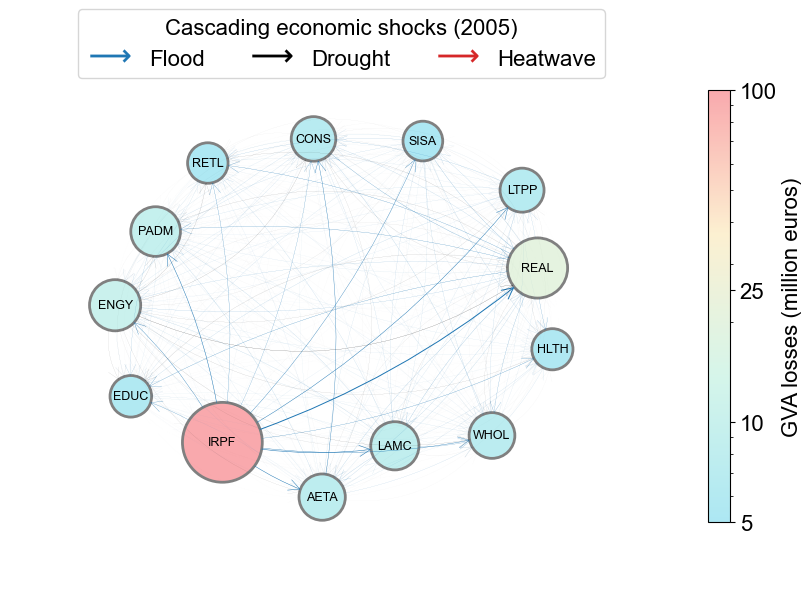

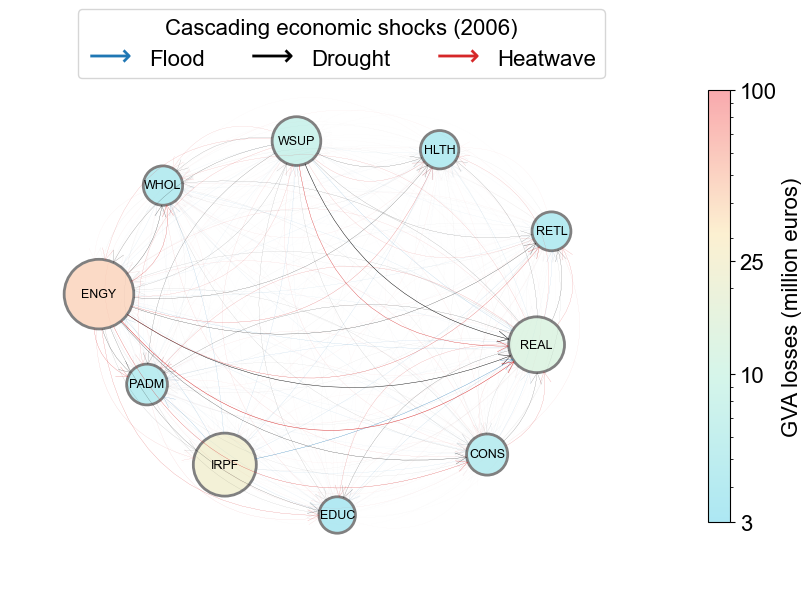

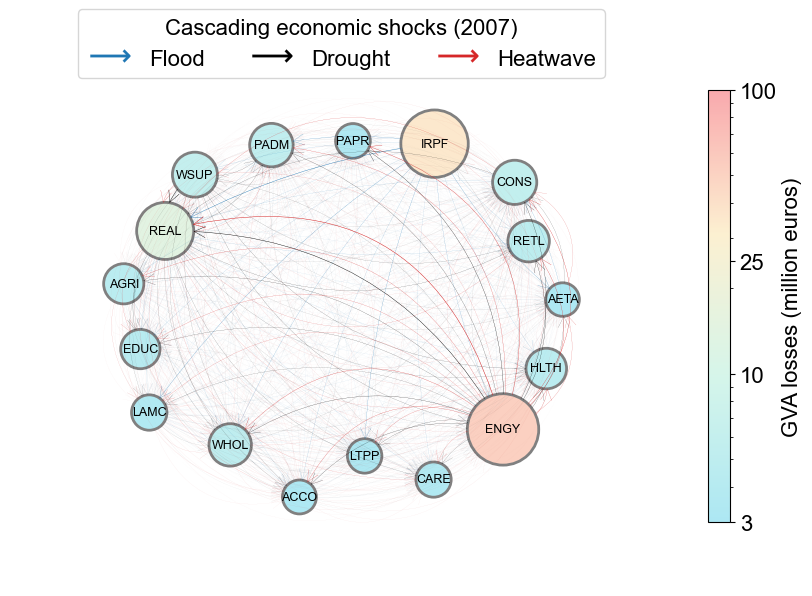

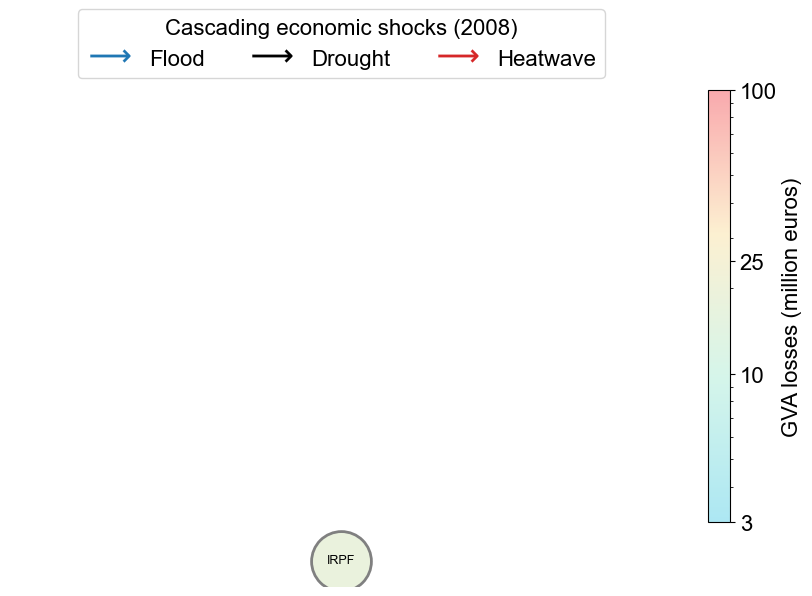

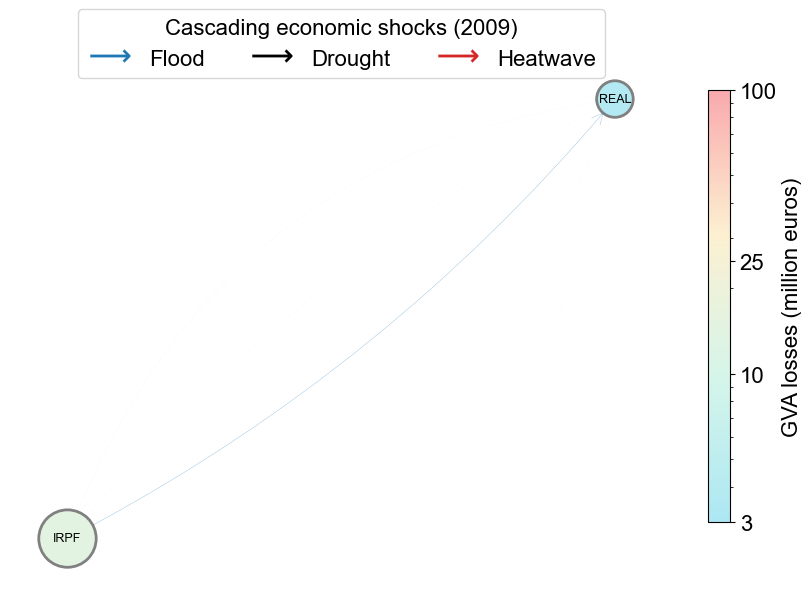

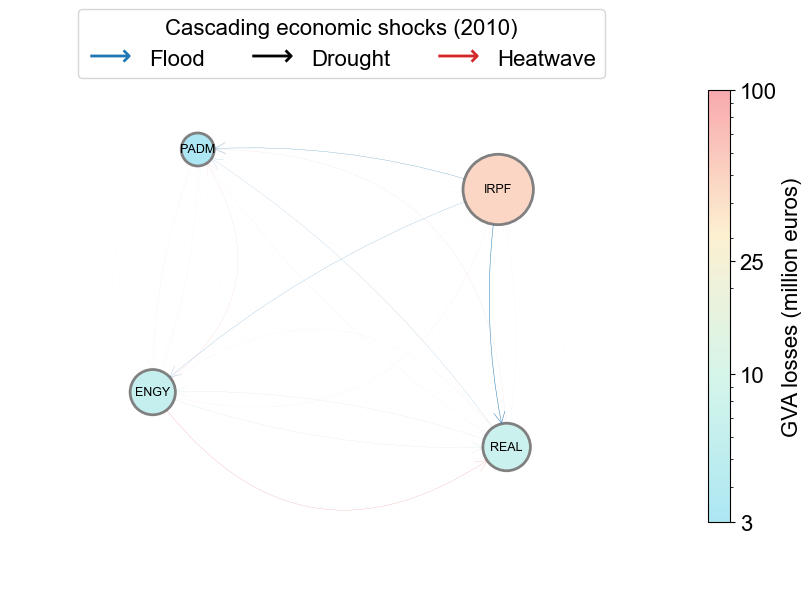

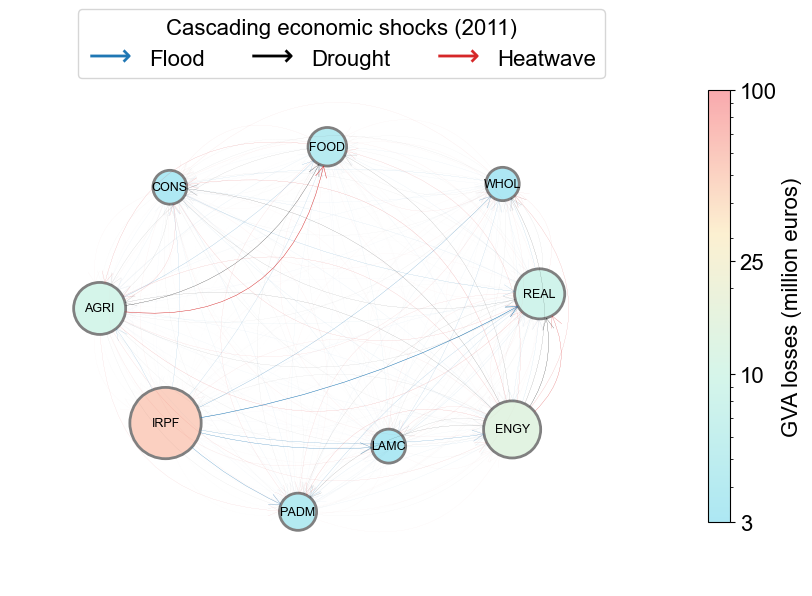

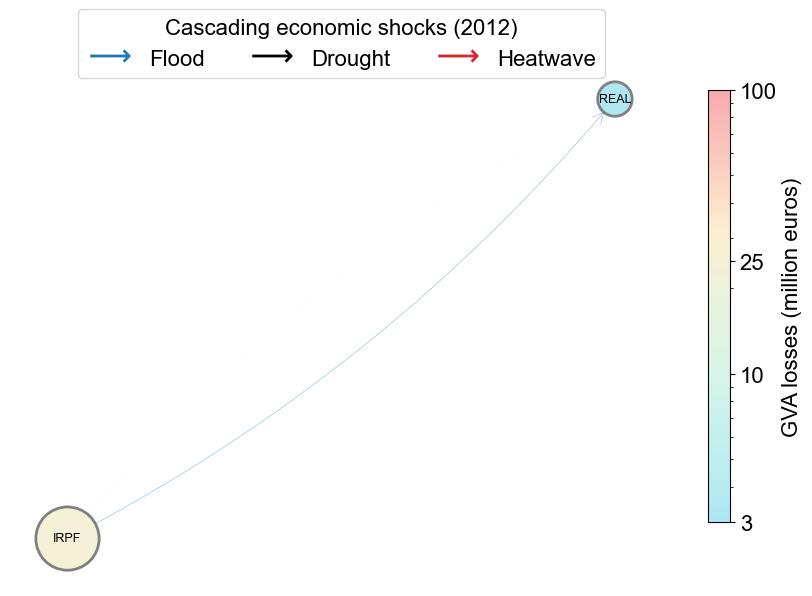

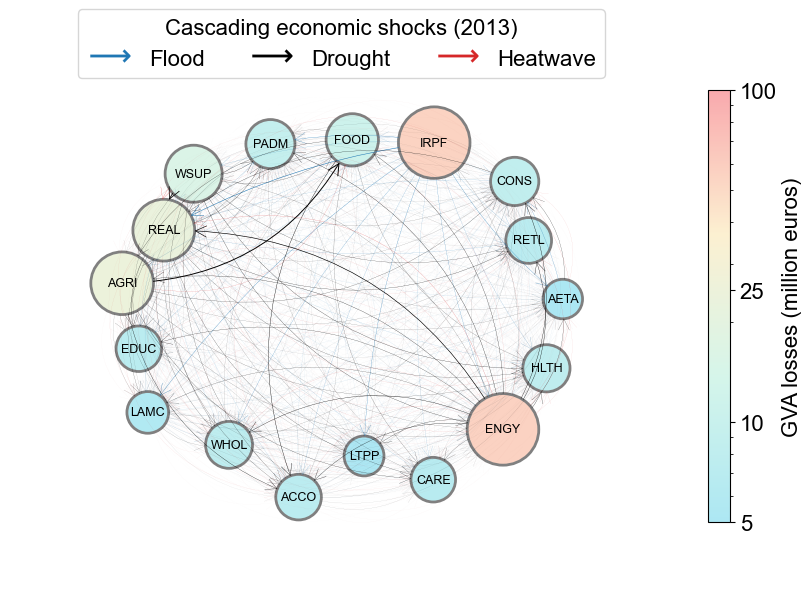

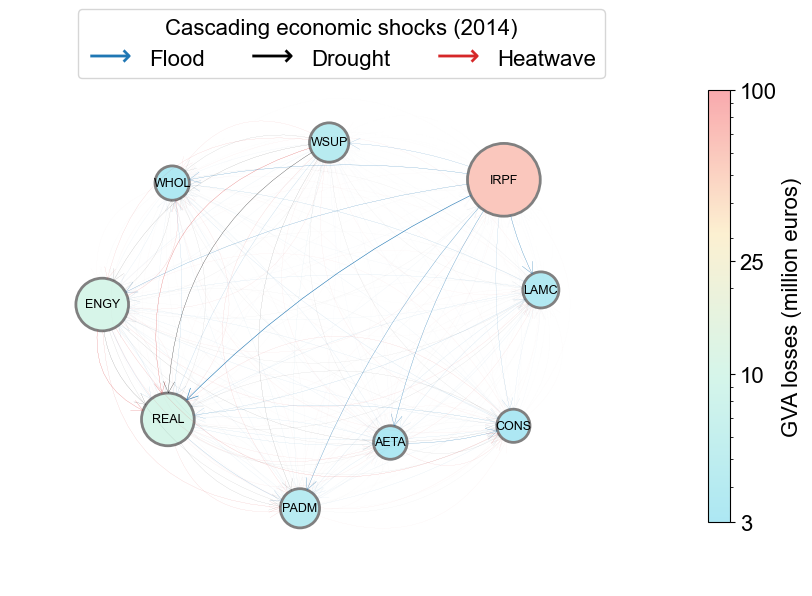

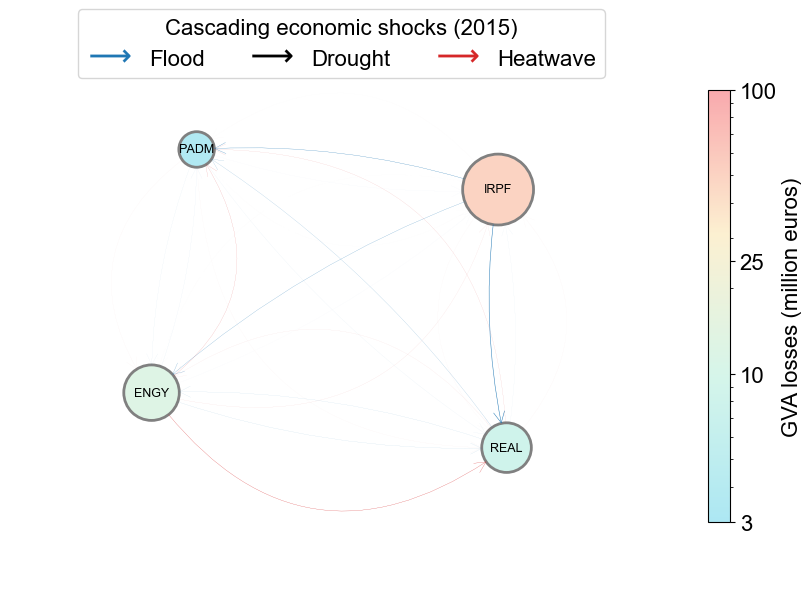

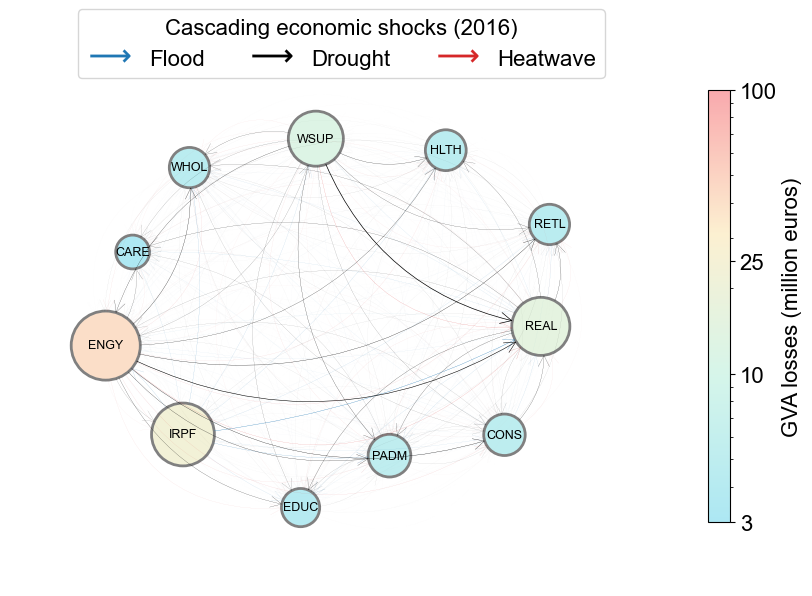

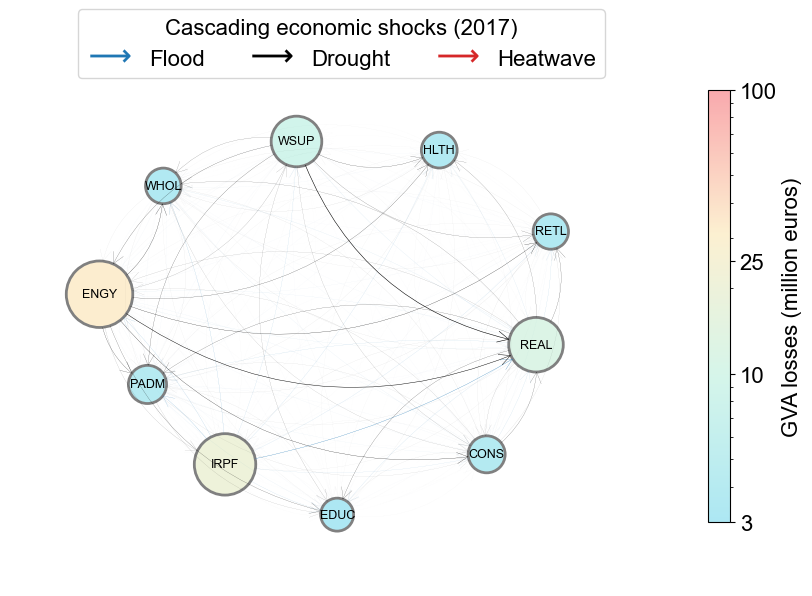

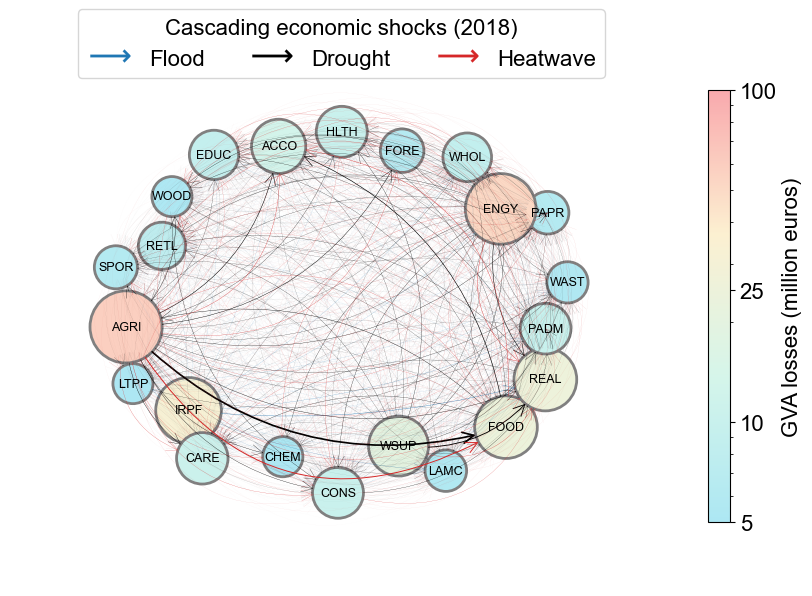

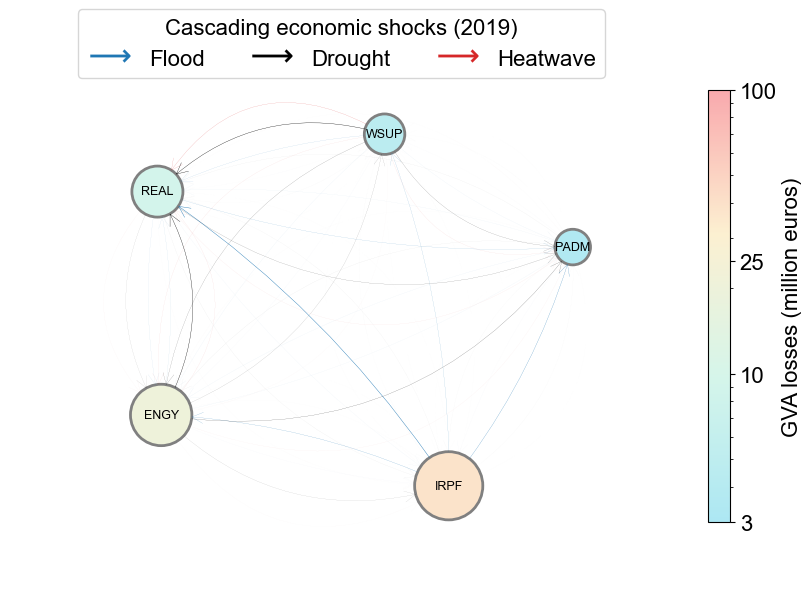

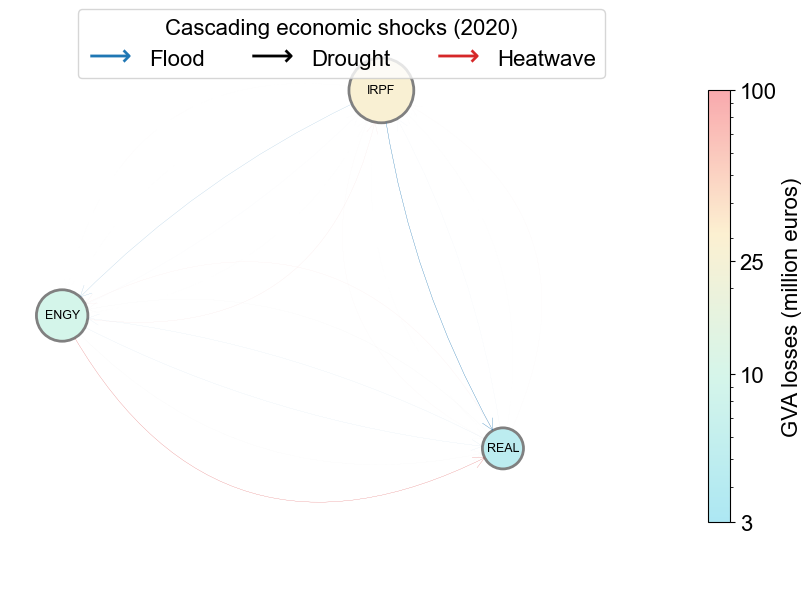

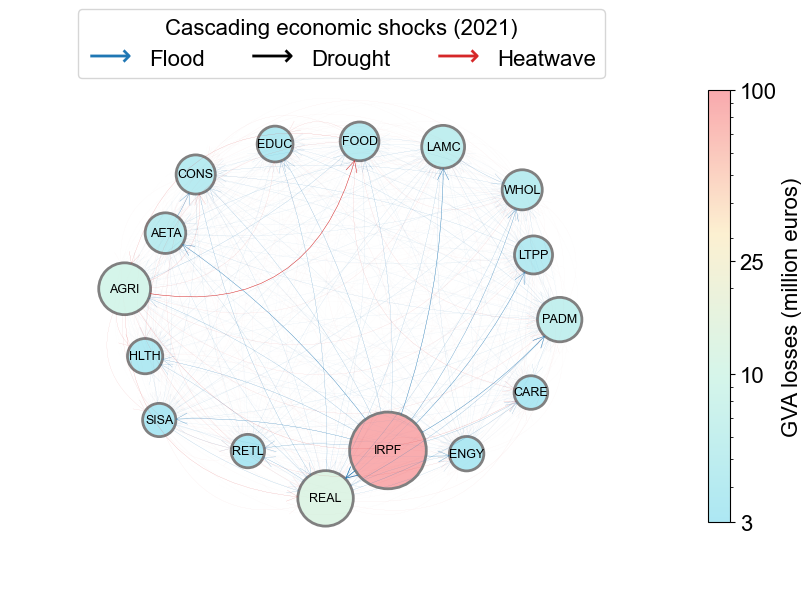

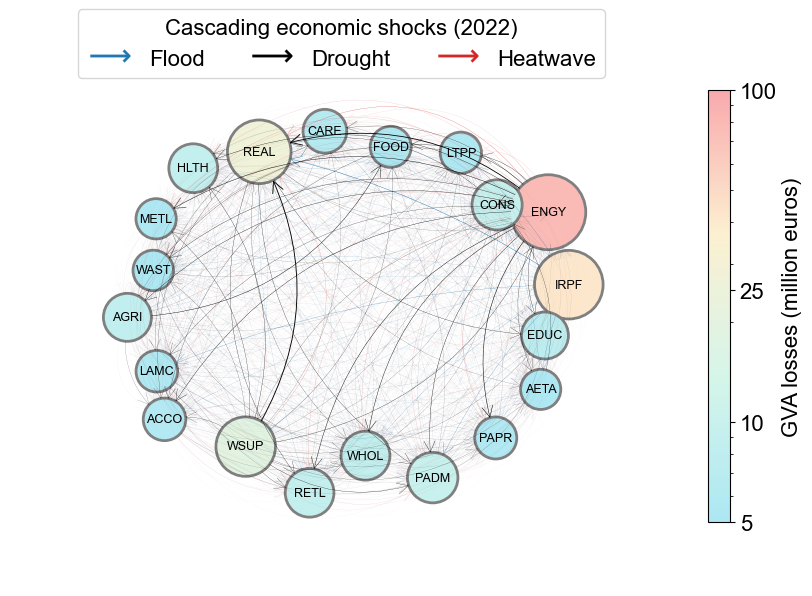

In [17]:
# Estimate losses using I-O modelling
# Read IO table
all_shock_df=pd.DataFrame()
io_df=pd.read_csv('matrix_eu-ic-io_ind-by-ind_24ed_2022.csv', index_col=0) # 2022 base year
# Read negative impacts
anomalies=pd.read_excel('Annual_negative_impacts.xlsx')
anomalies=anomalies.sort_values('Time')
years=anomalies.Time.unique()

for year in years:
    if year==2018 or year==2013 or year==2022 or year==2005:
        tol=5
    else:
        tol=3
    shock_df_dict_year=estimate_shocks(io_df, anomalies, damage, year, 'SE', tol)
    # Loop through the dictionary and append each DataFrame
    for key, df in shock_df_dict_year.items():
        all_shock_df = pd.concat([all_shock_df, df], ignore_index=True)

In [18]:
all_shock_df.to_excel('Economic_shocks_results.xlsx') # Save results
#all_shock_df= pd.read_excel('Economic_shocks_results.xlsx') # Read results

In [19]:
# Checking values mentioned in the manuscript

In [20]:
# Verify losses due to floods in 2013 and 2022 in the insurance sector

flood_losses=all_shock_df[all_shock_df['Hazard']=='Flood']
flood_losses_2013=flood_losses[flood_losses['Year']==2013]
flood_losses_2013.sort_values('Initial shock').head(1)

Code  Initial shock  Final shock       GVA  GVA change  \
2089  K65      -3.224414    -3.464855  5799.654 -200.949579   

            Shortened Title Abbreviation  Year Hazard  
2089  Insurance and Pension         IRPF  2013  Flood

In [21]:
# Verify losses due to floods in 2013 and 2022 in the insurance sector
flood_losses_2022=flood_losses[flood_losses['Year']==2022]
flood_losses_2022.sort_values('Initial shock').head(1)

Code  Initial shock  Final shock       GVA  GVA change  \
4393  K65      -2.087636    -2.243308  5799.654 -130.104103   

            Shortened Title Abbreviation  Year Hazard  
4393  Insurance and Pension         IRPF  2022  Flood

In [22]:
# Flood losses as a share of GDP in 2005
flood_losses_2025=flood_losses[flood_losses['Year']==2005]
sw_gdp=392200 # in million euros
flood_losses_2025['GVA change'].sum()/sw_gdp*(-100)

0.2369200934539354

In [23]:
# Estimate % losses per sector compared to total
drought_shock_df=all_shock_df[all_shock_df['Hazard']=='Drought']
drought_shock_df.groupby('Shortened Title').agg('sum').sort_values('GVA change')

# Percentage Losses in the energy sector
print(-1116/drought_shock_df.groupby('Shortened Title').agg('sum')['GVA change'].sum()*100)

# Percentage Losses in the water supply sector
print(-172.1/drought_shock_df.groupby('Shortened Title').agg('sum')['GVA change'].sum()*100)

43.28449922797138
6.674966233990927


In [24]:
code_guide=pd.read_excel('Sector_Codes.xlsx')
# Obtaining list of economic sector codes mostly affected with at least 5 million euro losses within a year
critical_sectors=all_shock_df[all_shock_df['GVA change']<=-5].Abbreviation.unique()
selected_code_guide = code_guide[code_guide['Abbreviation'].isin(critical_sectors)]
selected_code_guide=selected_code_guide[['Abbreviation', 'Industry']]
selected_code_guide=selected_code_guide.sort_values('Abbreviation')
selected_code_guide.to_excel('Critical_sectors.xlsx', index=False)
selected_code_guide

Abbreviation                                           Industry
35         ACCO          Accommodation and food service activities
45         AETA  Architectural and engineering activities; tech...
0          AGRI  Crop and animal production, hunting and relate...
56         CARE  Residential care activities and social work ac...
10         CHEM     Manufacture of chemicals and chemical products
26         CONS                                       Construction
54         EDUC                                          Education
23         ENGY  Electricity, gas, steam and air conditioning s...
4          FOOD  Manufacture of food products; beverages and to...
1          FORE                               Forestry and logging
55         HLTH                            Human health activities
41         IRPF  Insurance, reinsurance and pension funding, ex...
44         LAMC  Legal and accounting activities; activities of...
30         LTPP         Land transport and transport via pipelines
14         METL                        Manufacture of basic metals
53         PADM  Public administration and defence; compulsory ...
7          PAPR            Manufacture of paper and paper products
43         REAL                             Real estate activities
29         RETL  Retail trade, except of motor vehicles and mot...
52         SISA  Security and investigation, service and landsc...
58         SPOR  Sports activities and amusement and recreation...
33         WAST  Warehousing and support activities for transpo...
28         WHOL  Wholesale trade, except of motor vehicles and ...
6          WOOD  Manufacture of wood and of products of wood an...
24         WSUP             Water collection, treatment and supply

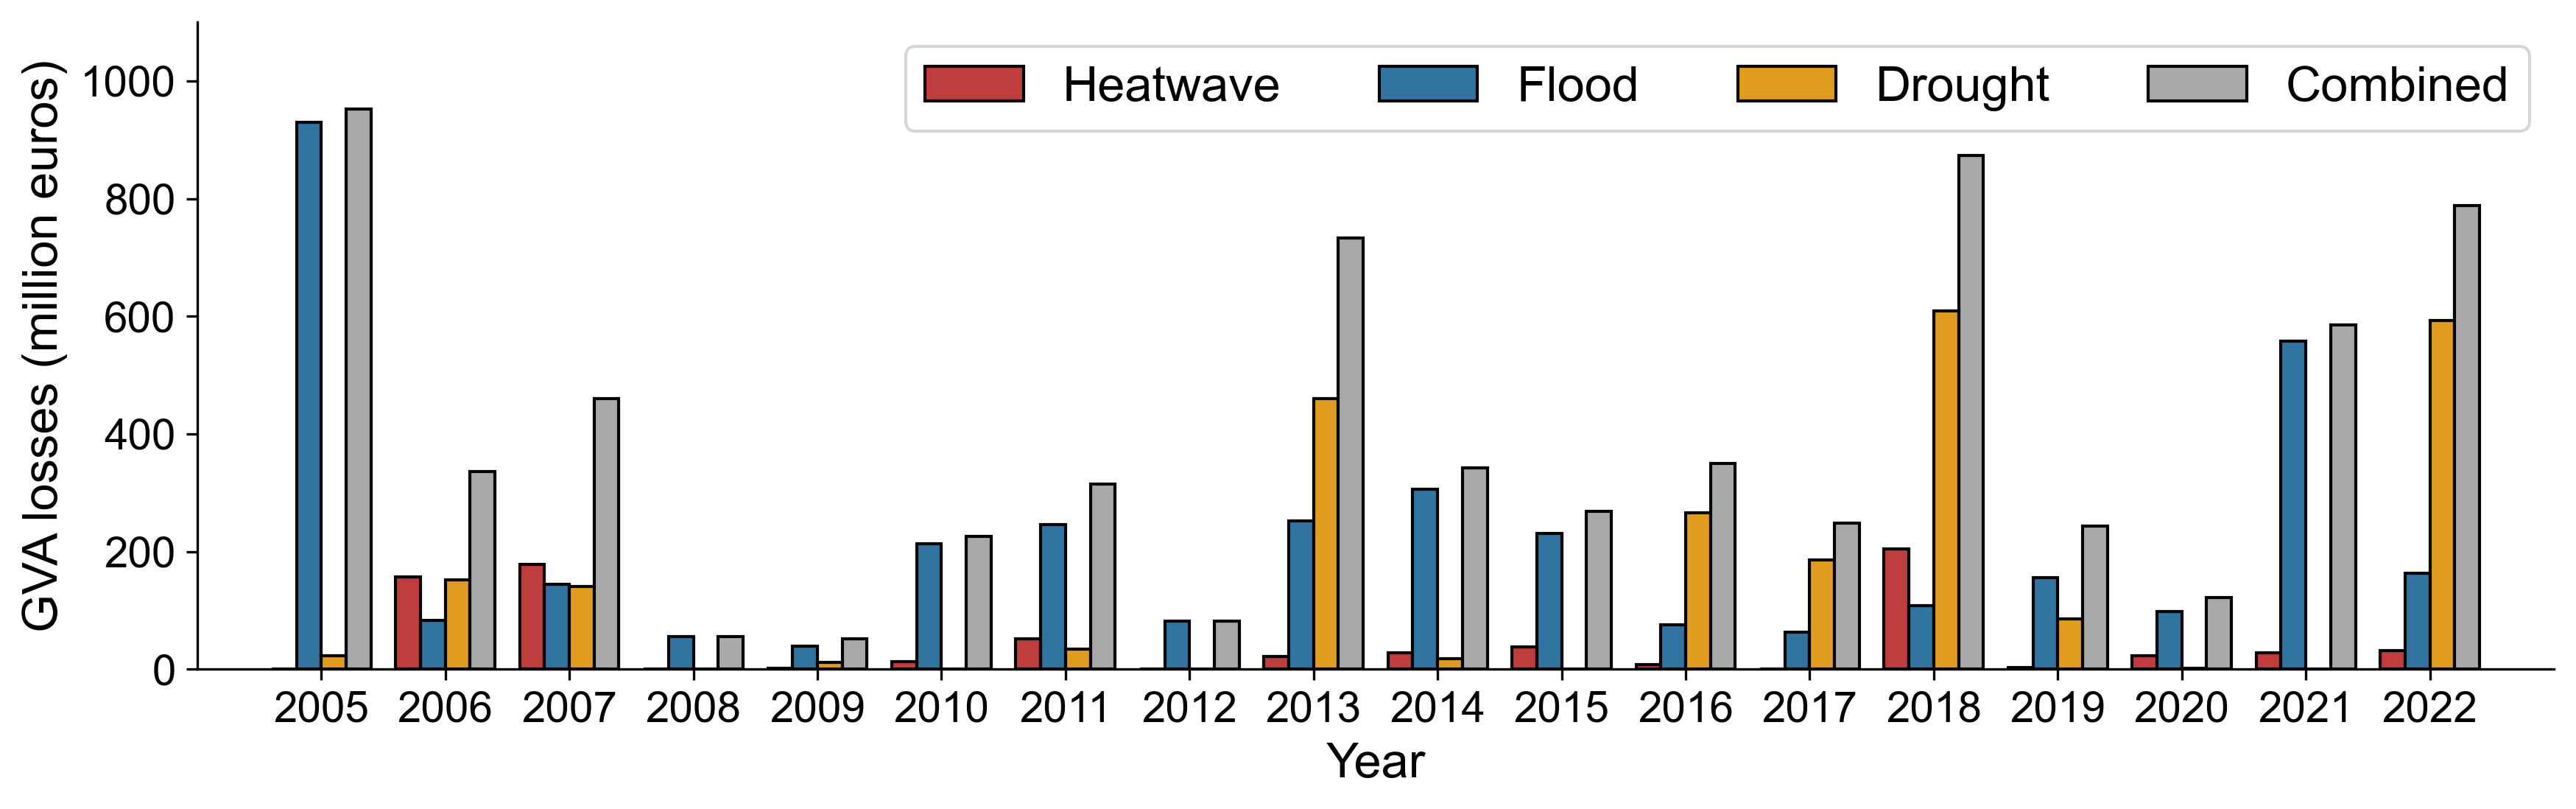

In [26]:
# Bar plot of annual losses

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

# Prepare data
shock_sum = all_shock_df.groupby(['Year', 'Hazard']).agg('sum').reset_index()
shock_sum = shock_sum.sort_values('Hazard', ascending=False)
shock_sum['GVA change'] = shock_sum['GVA change'] * (-1)

# Calculate the Mann-Kendall trend
shock_sum_comb = shock_sum[shock_sum['Hazard'] == 'Combined']
shock_sum_comb = shock_sum_comb.sort_values('Year')
years = shock_sum_comb['Year'].unique()
gva_change = shock_sum_comb['GVA change'].values

# Using Kendall's tau as a non-parametric measure of correlation and trend slope
tau, p_value = kendalltau(years, gva_change)

# Calculate slope (trend line)
slope = tau * (np.std(gva_change) / np.std(years))
intercept = np.mean(gva_change) - slope * np.mean(years)

# Set colors for the bars
bar_colors = ['#d62728', '#1f77b4', 'orange', '#A9A9A9']



# Set font properties
DEFAULT_SIZE=16
LARGE_SIZE=18
SMALL_SIZE=14
plt.rc("font", family="Arial")
plt.rc("font", size=LARGE_SIZE)
plt.rc("axes", titlesize=LARGE_SIZE)
plt.rc("axes", labelsize=LARGE_SIZE)
plt.rc("xtick", labelsize=SMALL_SIZE)
plt.rc("ytick", labelsize=SMALL_SIZE)
plt.rc("legend", fontsize=DEFAULT_SIZE)

years = years.astype(int)
shock_sum["Year"] = shock_sum["Year"].astype(int)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 4), dpi=300)

# Create a bar plot
sns.barplot(x="Year", y="GVA change", data=shock_sum, hue='Hazard', 
            palette=bar_colors, edgecolor='black', ax=ax)

# Customize the axes limits
ax.set_ylim(0, 1100)
ax.set_xlim(-1, 18)

# Prepare data for the trend line
trend_data = pd.DataFrame({
    'Year': years,
    'Trend Line': intercept + slope * years
})

# Plot the trend line using sns.lineplot
#sns.lineplot(x=ax.get_xticks(), y='Trend Line', data=trend_data, color='red', linestyle='--', linewidth=2, 
             #label='Trend, p: {:.4f}'.format(p_value), ax=ax)
     
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Customize the plot labels
ax.set_ylabel('GVA losses (million euros)', fontsize=DEFAULT_SIZE)
ax.set_xlabel('Year', fontsize=DEFAULT_SIZE)
#ax.set_title('Attributed Annual Change to GVA in Sweden from Hydroclimatic Hazards', fontsize=16)

# Show legend
ax.legend(title_fontsize=str(SMALL_SIZE), ncol=5)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure in high-quality format

plt.savefig('fig_losses_comb.svg', dpi=300, bbox_inches='tight')
plt.show()


In [27]:
shock_sum[shock_sum['Year']==2018]

Year    Hazard  Initial shock  Final shock         GVA  GVA change
55  2018  Heatwave      -2.086530    -3.601896  520182.948  203.798018
54  2018     Flood      -1.382886    -1.761823  520182.948  108.183823
53  2018   Drought     -10.853591   -15.505365  520182.948  608.878729
52  2018  Combined     -13.800961   -19.966143  520182.948  873.892133

In [28]:
# Compound losses due to droughts + heatwaves in 2018
873.89-108.18

765.71

In [29]:
# Total GVA change losses per hazard type for all years
shock_sum.groupby('Hazard').agg('sum')

Year  Initial shock  Final shock          GVA   GVA change
Hazard                                                               
Combined  36243     -95.413028  -127.814545  9363293.064  7027.143917
Drought   36243     -41.257568   -56.437633  9363293.064  2578.290196
Flood     36243     -48.541448   -61.940000  9363293.064  3798.267801
Heatwave  36243      -7.454219   -12.094660  9363293.064   784.018774